**Metrics and Evaluation - California Housing**

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer # Added ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x,y = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<bound method Figure.tight_layout of <Figure size 1000x600 with 8 Axes>>

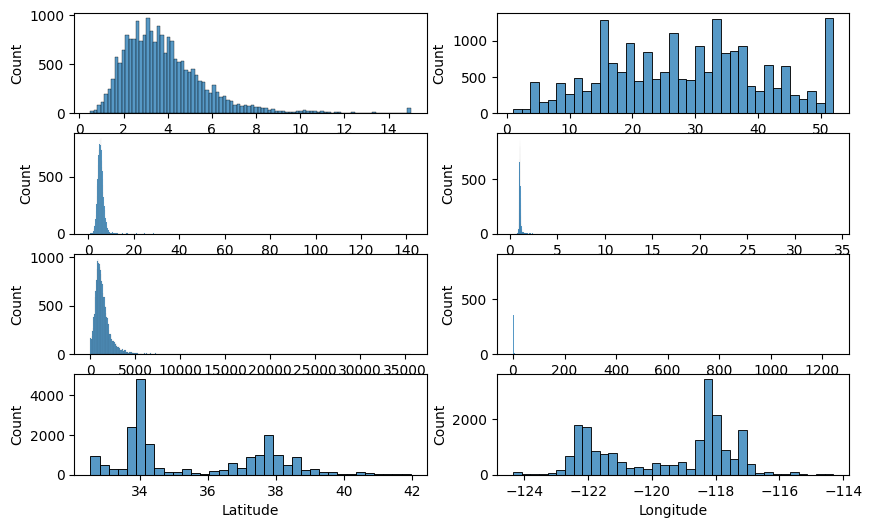

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(10,6))

for ax, col in zip(ax.flatten(), x.columns):
  sns.histplot(x[col], ax=ax)

fig.tight_layout

<Axes: xlabel='Longitude', ylabel='Latitude'>

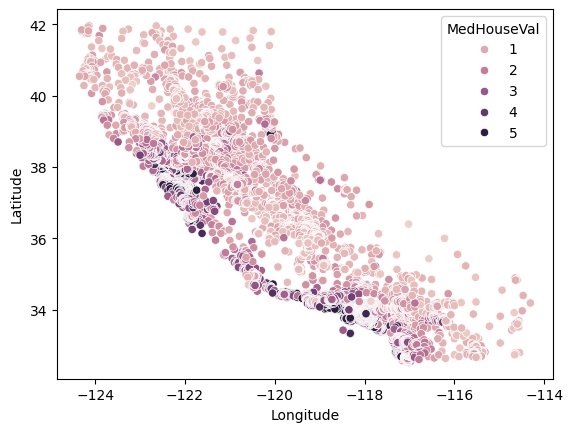

In [ ]:
sns.scatterplot(x=x['Longitude'], y=x['Latitude'], hue=y)

<Axes: xlabel='MedHouseVal', ylabel='Count'>

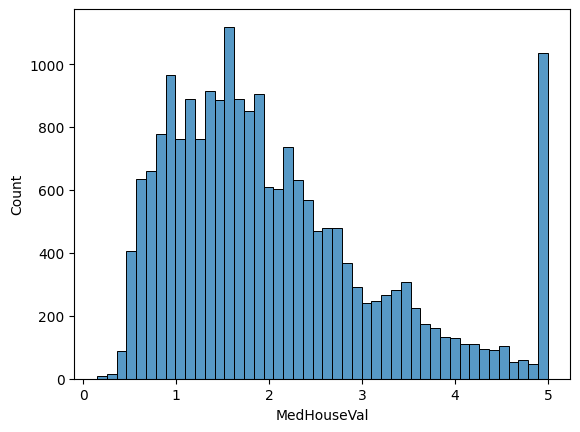

In [ ]:
sns.histplot(y)

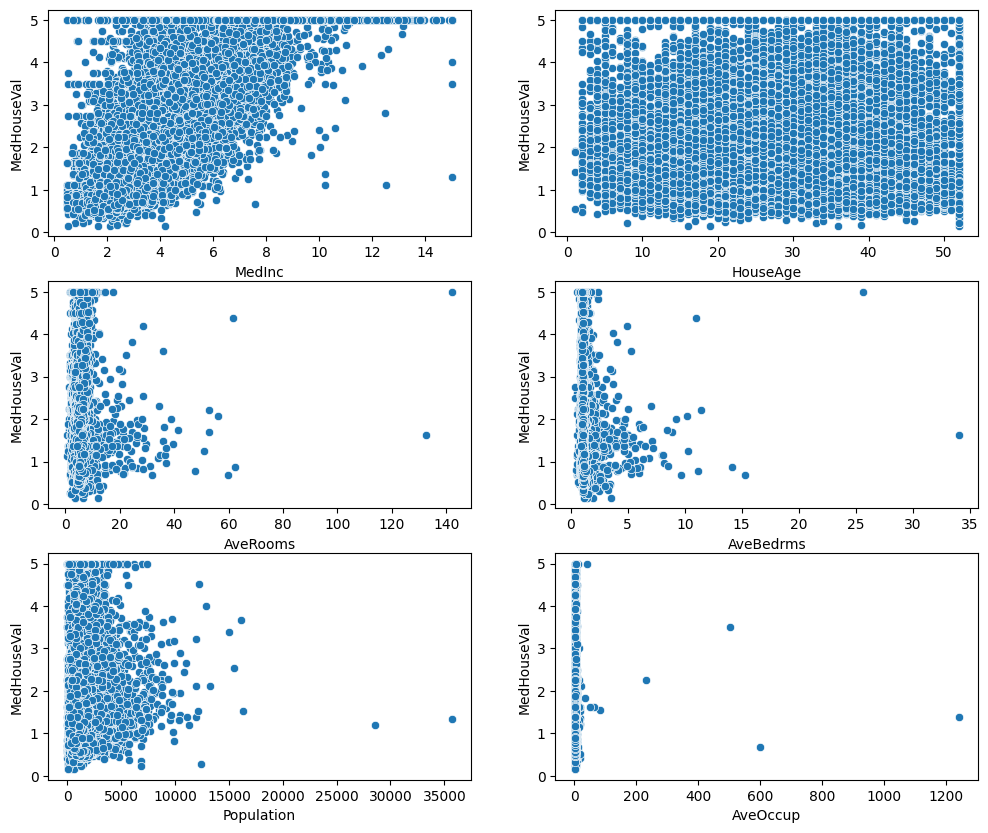

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for ax, col in zip(axs.ravel(), cols):
  sns.scatterplot(x=x[col], y=y, ax=ax)

  fig.tight_layout

In [ ]:
x_train, x_testval, y_train, y_testval = train_test_split(x,y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, test_size=0.5, random_state=42)

In [ ]:
# Use IQR to cap outliers
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1

x_train_capped = x_train.copy()
x_test_capped = x_test.copy()
x_val_capped = x_val.copy()

for col in x_train.columns:
  lower_bound = Q1[col] - 1.5 * IQR[col]
  upper_bound = Q3[col] + 1.5 * IQR[col]
  x_train_capped[col] = x_train[col].clip(lower_bound, upper_bound)
  x_test_capped[col] = x_test[col].clip(lower_bound, upper_bound)
  x_val_capped[col] = x_val[col].clip(lower_bound, upper_bound)

x_train = x_train_capped
x_test = x_test_capped
x_val = x_val_capped

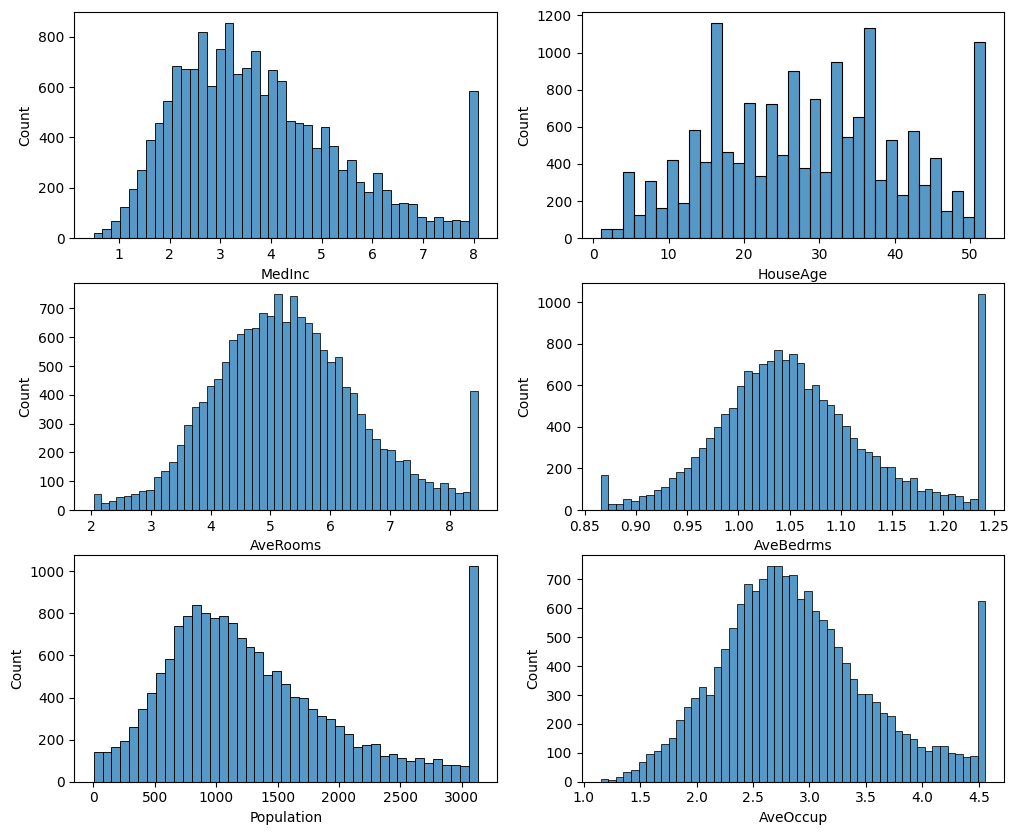

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for ax, col in zip(axs.ravel(), cols):
  sns.histplot(x=x_train[col],ax=ax)

  fig.tight_layout

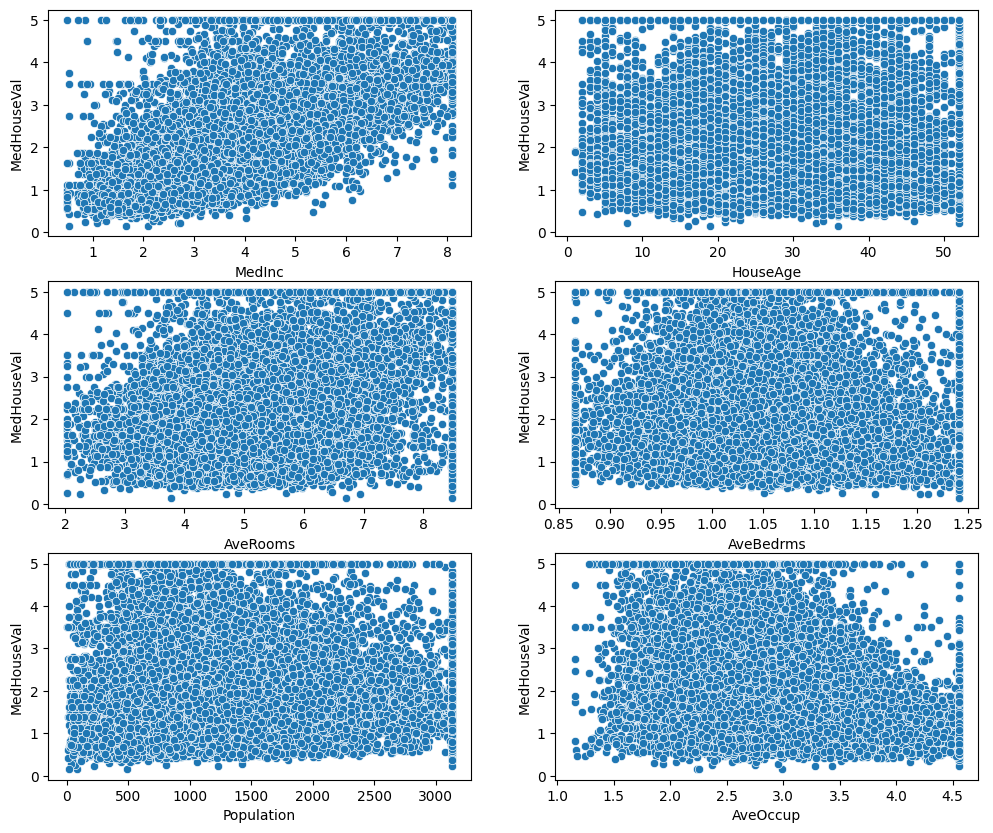

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for ax, col in zip(axs.ravel(), cols):
  sns.scatterplot(x=x_train[col], y=y, ax=ax)

  fig.tight_layout

In [ ]:
preprocessing = make_pipeline(
    ColumnTransformer([
        ('num', MinMaxScaler(), x_train.columns)
    ])
)

In [ ]:
x_train_processed = preprocessing.fit_transform(x_train)
x_test_processed = preprocessing.transform(x_test)
x_val_processed = preprocessing.transform(x_val)

**Training and Evaluation**

We will create a Linear regression model and evaluate it using different metrics.

Our main metric will be the Root Mean Squared Error (RSME)

In [ ]:
model = LinearRegression()

model.fit(x_train_processed, y_train)

LinearRegression()

In [ ]:
def evaluate_model(model, x,y):
  y_pred = model.predict(x)

  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = root_mean_squared_error(y, y_pred)
  r2 = r2_score(y, y_pred)

  return {
      'MAE': mae,
      'MSE': mse,
      'RSME': rmse,
      'R2': r2
  }

train_metrics = evaluate_model(model, x_train_processed, y_train)
val_metrics = evaluate_model(model, x_val_processed, y_val)

metrics_df = (
  pd.DataFrame([train_metrics, val_metrics], index=['Train', 'Validation'])
  .reset_index()
  .rename(columns={'index': 'Dataset'})
)
metrics_df

,Dataset,MAE,MSE,RSME,R2
0,Train,0.492680,0.437935,0.661767,0.672395
1,Validation,0.502495,0.452564,0.672729,0.652773


In [ ]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x_train_processed, y_train)

train_metrics_no_intercept = evaluate_model(lr, x_train_processed, y_train)
val_metrics_no_intercept = evaluate_model(lr, x_val_processed, y_val)
metrics_no_intercept_df = (
  pd.DataFrame([train_metrics_no_intercept, val_metrics], index=['Train', 'Validation'])
  .reset_index()
  .rename(columns={'index': 'Dataset'})
)
metrics_no_intercept_df


,Dataset,MAE,MSE,RSME,R2
0,Train,0.523500,0.500704,0.707604,0.625440
1,Validation,0.502495,0.452564,0.672729,0.652773


In [ ]:
m = RandomForestRegressor()

m.fit(x_train_processed, y_train)

_train_metrics = evaluate_model(m, x_train_processed, y_train)
_val_metrics = evaluate_model(m, x_val_processed, y_val)

_metrics = (
  pd.DataFrame([_train_metrics, _val_metrics], index=['Train', 'Validation'])
  .reset_index()
  .rename(columns={'index': 'Dataset'})
)
_metrics


,Dataset,MAE,MSE,RSME,R2
0,Train,0.122481,0.035547,0.188539,0.973408
1,Validation,0.328909,0.256887,0.506840,0.802905


In [ ]:
_test_metrics = evaluate_model(m, x_test_processed, y_test)
_test_metrics

{'MAE': 0.3275426067829459,
 'MSE': 0.24880393518559857,
 'RSME': 0.4988025011821799,
 'R2': 0.8110491960666137}

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error')
grid_search.fit(x_train_processed, y_train)

KeyboardInterrupt: 

In [ ]:
best = grid_search.best_estimator_

train_metrics = evaluate_model(best, x_train_processed, y_train)
val_metrics = evaluate_model(best, x_val_processed, y_val)
test_metrics = evaluate_model(best, x_test_processed, y_test)

metrics_df = (
  pd.DataFrame([train_metrics, val_metrics, test_metrics], index=['Train', 'Validation', 'Test'])
  .reset_index()
  .rename(columns={'index': 'Dataset'})
)
metrics_df

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
grid_search.best_params_